In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from traintest import *

In [8]:
DataClass = subjecData()
DataClass.build()

# Model evaluation

In [9]:
def Eval_Model(model, DataClass):
    
    model.eval()
    pred = model(DataClass.X_test)
    pred = torch.argmax(pred, dim=1)
    y_Test = torch.argmax(DataClass.y_test, dim=1)

    # Calculate test metrics
    accuracy = accuracy_score(y_Test, pred)
    precision = precision_score(y_Test, pred, average=None)
    recall = recall_score(y_Test, pred, average=None)
    f1 = f1_score(y_Test, pred, average=None)
    
    print(f' Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')
    return accuracy, precision, recall, f1

In [10]:
NetDict = {'TimeAggNet':TimeAggNet,'TimeGraphNet':TimeGraphNet,'DeepTimeGraphNet':DeepTimeGraphNet,
           'SimpleTimeGraphNet':SimpleTimeGraphNet}

In [11]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
subj = 0
j = 0
epochs = 250

ps = []
recs = []
accs = []
f1s = []
names = []

for net_name in tqdm(NetDict.keys()):
    net = NetDict[net_name](device, DataClass.num_nodes, 1200)#El argumento cambia para las adaptative
    model_path = f"./training/models/sub{subj}/{net_name}.pth"
    #metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}.csv"
    net.load_state_dict(torch.load(model_path))
    accuracy, precision, recall, f1 = Eval_Model(net, DataClass)
    ps.append(precision)
    recs.append(recall)
    accs.append(accuracy)
    f1s.append(f1)
    names.append(net_name)
    
    if j>=1:
        net = NetDict[net_name](device, DataClass.num_nodes, 1200, True)#El argumento cambia para las adaptative
        model_path = f"./training/models/sub{subj}/{net_name}Adap.pth"
        #metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}Adap.csv"
        net.load_state_dict(torch.load(model_path))
        accuracy, precision, recall, f1 = Eval_Model(net, DataClass)
        ps.append(precision)
        recs.append(recall)
        accs.append(accuracy)
        f1s.append(f1)
        names.append(net_name+'Adap')
        
    j = j+1

 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.22it/s]

 Accuracy: 0.7538461538461538, Precision: [0.76666667 0.76923077 0.72151899], Recall: [0.78409091 0.8045977  0.67058824], F1-Score: [0.7752809  0.78651685 0.69512195]
 Accuracy: 0.8269230769230769, Precision: [0.85882353 0.8172043  0.80487805], Recall: [0.82954545 0.87356322 0.77647059], F1-Score: [0.84393064 0.84444444 0.79041916]


 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.39s/it]

 Accuracy: 0.75, Precision: [0.7721519  0.82352941 0.66666667], Recall: [0.69318182 0.8045977  0.75294118], F1-Score: [0.73053892 0.81395349 0.70718232]
 Accuracy: 0.8615384615384616, Precision: [0.86206897 0.90697674 0.81609195], Recall: [0.85227273 0.89655172 0.83529412], F1-Score: [0.85714286 0.9017341  0.8255814 ]


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:04<00:01,  1.89s/it]

 Accuracy: 0.8384615384615385, Precision: [0.85542169 0.94805195 0.74      ], Recall: [0.80681818 0.83908046 0.87058824], F1-Score: [0.83040936 0.8902439  0.8       ]
 Accuracy: 0.7807692307692308, Precision: [0.86956522 0.8313253  0.68518519], Recall: [0.68181818 0.79310345 0.87058824], F1-Score: [0.76433121 0.81176471 0.76683938]


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.55s/it]

 Accuracy: 0.7346153846153847, Precision: [0.71578947 0.7826087  0.69863014], Recall: [0.77272727 0.82758621 0.6       ], F1-Score: [0.7431694  0.80446927 0.64556962]


In [ ]:
recs = np.array(recs)
ps = np.array(ps)
f1s = np.array(f1s)

dic = {'Accuracy':accs,'Recall class 0':recs[:,0],'Recall class 1':recs[:,1],'Recall class 2':recs[:,2],
       'Precision class 0':ps[:,0],'Precision class 1':ps[:,1],'Precision class 2':ps[:,2],'F1 class 0':f1s[:,0],
       'F1 class 1':f1s[:,1],'F1 class 2':f1s[:,2]}
df = pd.DataFrame.from_dict(dic)
df.index = names


In [12]:
df_sep = [df[df.columns[:4]], df[df.columns[4:-3]] , df[df.columns[-3:]]]
for sep in df_sep:
    print(sep.to_latex(float_format="%.3f", index=True))
    print('\\vspace{1em}')

\begin{tabular}{lrrrr}
\toprule
 & Accuracy & Recall class 0 & Recall class 1 & Recall class 2 \\
\midrule
TimeAggNet & 0.754 & 0.784 & 0.805 & 0.671 \\
TimeGraphNet & 0.827 & 0.830 & 0.874 & 0.776 \\
TimeGraphNetAdap & 0.750 & 0.693 & 0.805 & 0.753 \\
DeepTimeGraphNet & 0.862 & 0.852 & 0.897 & 0.835 \\
DeepTimeGraphNetAdap & 0.838 & 0.807 & 0.839 & 0.871 \\
SimpleTimeGraphNet & 0.781 & 0.682 & 0.793 & 0.871 \\
SimpleTimeGraphNetAdap & 0.735 & 0.773 & 0.828 & 0.600 \\
\bottomrule
\end{tabular}

\vspace{1em}
\begin{tabular}{lrrr}
\toprule
 & Precision class 0 & Precision class 1 & Precision class 2 \\
\midrule
TimeAggNet & 0.767 & 0.769 & 0.722 \\
TimeGraphNet & 0.859 & 0.817 & 0.805 \\
TimeGraphNetAdap & 0.772 & 0.824 & 0.667 \\
DeepTimeGraphNet & 0.862 & 0.907 & 0.816 \\
DeepTimeGraphNetAdap & 0.855 & 0.948 & 0.740 \\
SimpleTimeGraphNet & 0.870 & 0.831 & 0.685 \\
SimpleTimeGraphNetAdap & 0.716 & 0.783 & 0.699 \\
\bottomrule
\end{tabular}

\vspace{1em}
\begin{tabular}{lrrr}
\toprule
 &

# Training metrics plots

In [27]:
NetDict = {'TimeAggNet':TimeAggNet,'TimeGraphNet':TimeGraphNet,'DeepTimeGraphNet':DeepTimeGraphNet,
           'SimpleTimeGraphNet':SimpleTimeGraphNet}

In [58]:
trainbysub = {}
Traindfs = []
for subj in tqdm(range(11)):
    names = []
    dataFrames = []
    j = 0
    for net_name in NetDict.keys():
        #net = NetDict[net_name](device, DataClass.num_nodes, 1200)#El argumento cambia para las adaptative
        #model_path = f"./training/models/sub{subj}/{net_name}.pth"
        metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}.csv"
        #net.load_state_dict(torch.load(model_path))
        dataFrames.append(pd.read_csv(metrics_path))
        names.append(net_name)
        
        if j>=1:
            #net = NetDict[net_name](device, DataClass.num_nodes, 1200, True)#El argumento cambia para las adaptative
            model_path = f"./training/models/sub{subj}/{net_name}Adap.pth"
            #metrics_path = f"./training/metrics/sub{subj}/metrics{net_name}Adap.csv"
            #net.load_state_dict(torch.load(model_path))
            dataFrames.append(pd.read_csv(metrics_path))
            names.append(net_name+'Adap')
            
            
        j = j+1
    
    trainbysub.update({f"sub{subj}":[dataFrames[3], dataFrames[4]]})
    train_vals = np.array([dataFrames[model].values[-1,1:] for model in range(7)])
    dfmodels = pd.DataFrame(train_vals, columns=list(dataFrames[0].columns[1:]))
    dfmodels.index = names
    Traindfs.append(dfmodels)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 34.92it/s]


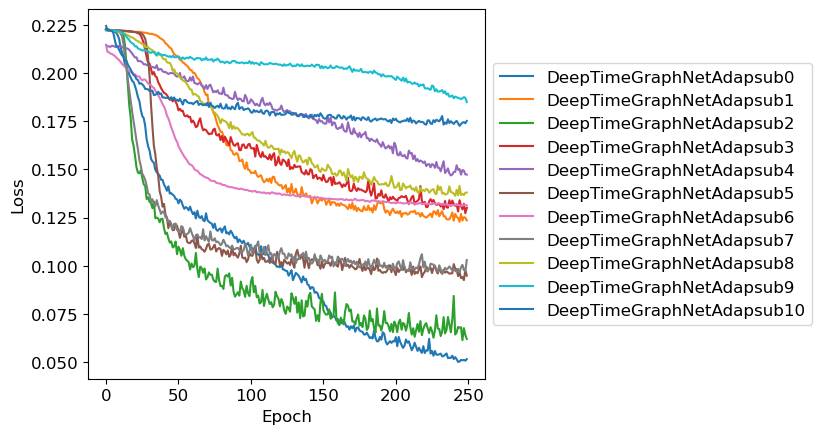

In [69]:
fig = plt.figure()
ax = plt.subplot(111)

m = 'Loss'
for sub in trainbysub.keys():
    #ax.plot(trainbysub[sub][0][m].values, label=f"DeepTimeGraphNet"+sub)
    ax.plot(trainbysub[sub][1][m].values, label=f"DeepTimeGraphNetAdap"+sub)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel("Epoch")
ax.set_ylabel(m)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(f"./training/plots/Training_{m}1.png", bbox_inches='tight', pad_inches=0.1)

In [53]:
train_avg = np.zeros(Traindfs[0].values.shape)
for df in Traindfs:
    train_avg = train_avg + df.values
train_avg = train_avg/len(Traindfs)
train_avg_df = pd.DataFrame(train_avg, columns=list(Traindfs[0].columns))
train_avg_df.index = names
print(train_avg_df.to_latex(float_format="%.3f", index=True))

\begin{tabular}{lrrrrr}
\toprule
 & Loss & Accuracy & Recall & Precision & F1 \\
\midrule
TimeAggNet & 0.112 & 0.768 & 0.766 & 0.768 & 0.765 \\
TimeGraphNet & 0.117 & 0.756 & 0.752 & 0.758 & 0.753 \\
TimeGraphNetAdap & 0.117 & 0.756 & 0.752 & 0.758 & 0.753 \\
DeepTimeGraphNet & 0.122 & 0.732 & 0.719 & 0.746 & 0.716 \\
DeepTimeGraphNetAdap & 0.122 & 0.732 & 0.719 & 0.746 & 0.716 \\
SimpleTimeGraphNet & 0.129 & 0.715 & 0.709 & 0.715 & 0.709 \\
SimpleTimeGraphNetAdap & 0.129 & 0.715 & 0.709 & 0.715 & 0.709 \\
\bottomrule
\end{tabular}



In [71]:
print(GenLaTexTables(Traindfs, False))

\begin{table}[h] 
 \centering 
\begin{tabular}{lrrrrr}
\toprule
 & Loss & Accuracy & Recall & Precision & F1 \\
\midrule
TimeAggNet & 0.090 & 0.813 & 0.813 & 0.814 & 0.813 \\
TimeGraphNet & 0.084 & 0.834 & 0.834 & 0.835 & 0.834 \\
TimeGraphNetAdap & 0.084 & 0.834 & 0.834 & 0.835 & 0.834 \\
DeepTimeGraphNet & 0.051 & 0.899 & 0.899 & 0.899 & 0.898 \\
DeepTimeGraphNetAdap & 0.051 & 0.899 & 0.899 & 0.899 & 0.898 \\
SimpleTimeGraphNet & 0.073 & 0.847 & 0.847 & 0.848 & 0.847 \\
SimpleTimeGraphNetAdap & 0.073 & 0.847 & 0.847 & 0.848 & 0.847 \\
\bottomrule
\end{tabular}
 
 \vspace{1em} 

\caption{Test results for subject 0.} 
 \label{tab:sub0test}\end{table} 
 
\begin{table}[h] 
 \centering 
\begin{tabular}{lrrrrr}
\toprule
 & Loss & Accuracy & Recall & Precision & F1 \\
\midrule
TimeAggNet & 0.124 & 0.768 & 0.765 & 0.765 & 0.764 \\
TimeGraphNet & 0.126 & 0.724 & 0.721 & 0.723 & 0.720 \\
TimeGraphNetAdap & 0.126 & 0.724 & 0.721 & 0.723 & 0.720 \\
DeepTimeGraphNet & 0.124 & 0.758 & 0.754 & 0.75

In [ ]:
for df in dataFrames

In [14]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

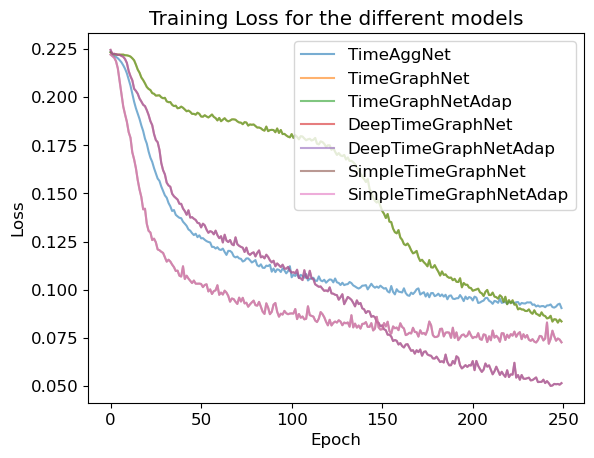

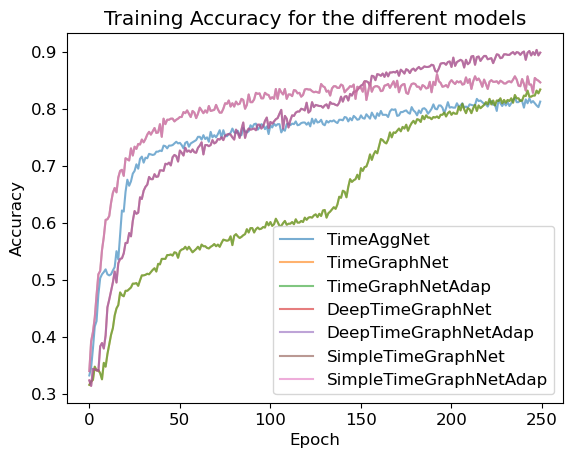

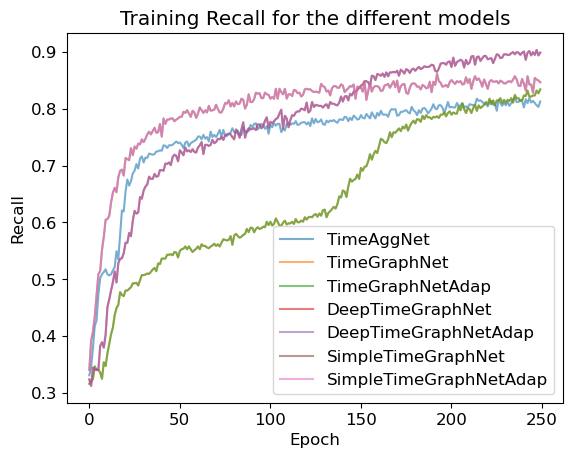

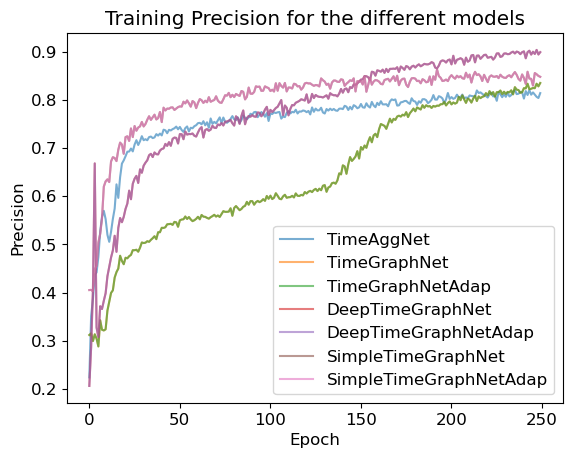

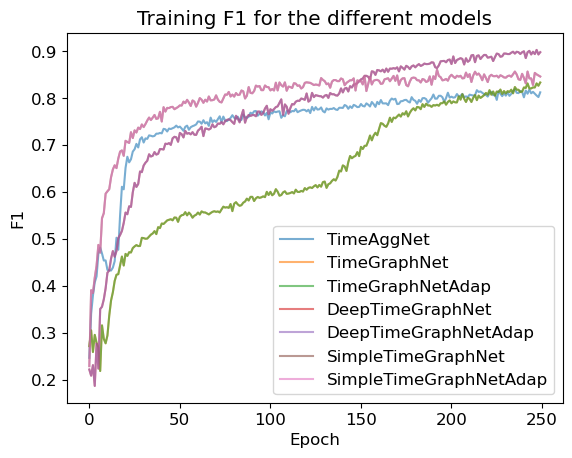

In [15]:
for Metric in dataFrames[0].columns[1:]:
    for i in range(len(dataFrames)):
        plt.plot(dataFrames[i][Metric], label=names[i], alpha=0.6)
        plt.xlabel('Epoch')
        plt.ylabel(Metric)
        plt.title(f"Training {Metric} for the different models")
    plt.legend()
    plt.savefig(f"./training/plots/Training_{Metric}.png")
    plt.show()

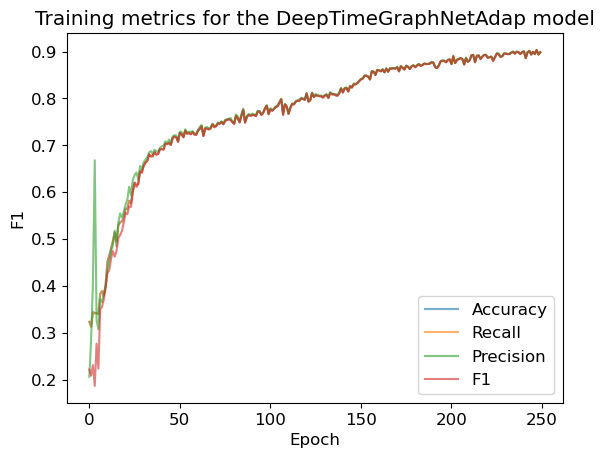

In [22]:
i = 4
for Metric in dataFrames[0].columns[2:]:
    plt.plot(dataFrames[i][Metric], label=Metric, alpha=0.6)
plt.xlabel('Epoch')
plt.ylabel(Metric)
plt.title(f"Training metrics for the DeepTimeGraphNetAdap model")
plt.legend()
plt.savefig(f"./training/plots/Training_Metrics_DeepTimeGraphNetAdap.png")
plt.show()

# Evaluation of all Models over All subjects

In [2]:
dframes = []
for sub in tqdm(range(11)):
    dframes.append(Sub_TestResults_DF(sub))

 25%|█████████████████████                                                               | 1/4 [00:02<00:06,  2.05s/it]

 Accuracy: 0.7538461538461538, Precision: [0.76666667 0.76923077 0.72151899], Recall: [0.78409091 0.8045977  0.67058824], F1-Score: [0.7752809  0.78651685 0.69512195]
 Accuracy: 0.8269230769230769, Precision: [0.85882353 0.8172043  0.80487805], Recall: [0.82954545 0.87356322 0.77647059], F1-Score: [0.84393064 0.84444444 0.79041916]



 50%|██████████████████████████████████████████                                          | 2/4 [00:04<00:04,  2.17s/it]

 Accuracy: 0.75, Precision: [0.7721519  0.82352941 0.66666667], Recall: [0.69318182 0.8045977  0.75294118], F1-Score: [0.73053892 0.81395349 0.70718232]
 Accuracy: 0.8615384615384616, Precision: [0.86206897 0.90697674 0.81609195], Recall: [0.85227273 0.89655172 0.83529412], F1-Score: [0.85714286 0.9017341  0.8255814 ]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:06<00:02,  2.35s/it]

 Accuracy: 0.8384615384615385, Precision: [0.85542169 0.94805195 0.74      ], Recall: [0.80681818 0.83908046 0.87058824], F1-Score: [0.83040936 0.8902439  0.8       ]
 Accuracy: 0.7807692307692308, Precision: [0.86956522 0.8313253  0.68518519], Recall: [0.68181818 0.79310345 0.87058824], F1-Score: [0.76433121 0.81176471 0.76683938]



  9%|███████▌                                                                           | 1/11 [00:58<09:49, 58.92s/it]

 Accuracy: 0.7346153846153847, Precision: [0.71578947 0.7826087  0.69863014], Recall: [0.77272727 0.82758621 0.6       ], F1-Score: [0.7431694  0.80446927 0.64556962]



 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  4.00it/s]

 Accuracy: 0.6470588235294118, Precision: [0.78481013 0.61111111 0.52112676], Recall: [0.75609756 0.52380952 0.62711864], F1-Score: [0.77018634 0.56410256 0.56923077]
 Accuracy: 0.6323529411764706, Precision: [0.73863636 0.56       0.54545455], Recall: [0.79268293 0.44444444 0.61016949], F1-Score: [0.76470588 0.49557522 0.576     ]



 50%|██████████████████████████████████████████                                          | 2/4 [00:01<00:02,  1.10s/it]

 Accuracy: 0.5931372549019608, Precision: [0.73493976 0.53030303 0.45454545], Recall: [0.74390244 0.55555556 0.42372881], F1-Score: [0.73939394 0.54263566 0.43859649]
 Accuracy: 0.7058823529411765, Precision: [0.81818182 0.66666667 0.60344828], Recall: [0.76829268 0.73015873 0.59322034], F1-Score: [0.79245283 0.6969697  0.5982906 ]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:04<00:01,  1.56s/it]

 Accuracy: 0.5098039215686274, Precision: [0.63291139 0.46376812 0.39285714], Recall: [0.6097561  0.50793651 0.37288136], F1-Score: [0.62111801 0.48484848 0.3826087 ]
 Accuracy: 0.7009803921568627, Precision: [0.80246914 0.68333333 0.58730159], Recall: [0.79268293 0.65079365 0.62711864], F1-Score: [0.79754601 0.66666667 0.60655738]



 18%|███████████████                                                                    | 2/11 [01:46<07:50, 52.32s/it]

 Accuracy: 0.7156862745098039, Precision: [0.79775281 0.65625    0.64705882], Recall: [0.86585366 0.66666667 0.55932203], F1-Score: [0.83040936 0.66141732 0.6       ]



 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.02it/s]

 Accuracy: 0.7807692307692308, Precision: [0.79545455 0.76829268 0.77777778], Recall: [0.79545455 0.72413793 0.82352941], F1-Score: [0.79545455 0.74556213 0.8       ]
 Accuracy: 0.7576923076923077, Precision: [0.87671233 0.73863636 0.68686869], Recall: [0.72727273 0.74712644 0.8       ], F1-Score: [0.79503106 0.74285714 0.73913043]



 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.39s/it]

 Accuracy: 0.7730769230769231, Precision: [0.82022472 0.78873239 0.72      ], Recall: [0.82954545 0.64367816 0.84705882], F1-Score: [0.82485876 0.70886076 0.77837838]
 Accuracy: 0.8384615384615385, Precision: [0.82608696 0.87837838 0.81914894], Recall: [0.86363636 0.74712644 0.90588235], F1-Score: [0.84444444 0.80745342 0.8603352 ]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:05<00:02,  2.04s/it]

 Accuracy: 0.8269230769230769, Precision: [0.89333333 0.8625     0.75238095], Recall: [0.76136364 0.79310345 0.92941176], F1-Score: [0.82208589 0.82634731 0.83157895]
 Accuracy: 0.7153846153846154, Precision: [0.65178571 0.82692308 0.72916667], Recall: [0.82954545 0.49425287 0.82352941], F1-Score: [0.73       0.61870504 0.77348066]



 27%|██████████████████████▋                                                            | 3/11 [02:46<07:24, 55.56s/it]

 Accuracy: 0.6846153846153846, Precision: [0.68292683 0.64285714 0.72340426], Recall: [0.63636364 0.62068966 0.8       ], F1-Score: [0.65882353 0.63157895 0.75977654]



 25%|█████████████████████                                                               | 1/4 [00:00<00:01,  2.48it/s]

 Accuracy: 0.5461538461538461, Precision: [0.6        0.51111111 0.53333333], Recall: [0.54545455 0.52873563 0.56470588], F1-Score: [0.57142857 0.51977401 0.54857143]
 Accuracy: 0.5961538461538461, Precision: [0.64634146 0.59036145 0.55789474], Recall: [0.60227273 0.56321839 0.62352941], F1-Score: [0.62352941 0.57647059 0.58888889]



 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:03,  1.53s/it]

 Accuracy: 0.6, Precision: [0.56435644 0.64197531 0.6025641 ], Recall: [0.64772727 0.59770115 0.55294118], F1-Score: [0.6031746  0.61904762 0.57668712]
 Accuracy: 0.6961538461538461, Precision: [0.72289157 0.65384615 0.7260274 ], Recall: [0.68181818 0.7816092  0.62352941], F1-Score: [0.70175439 0.71204188 0.67088608]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:05<00:02,  2.12s/it]

 Accuracy: 0.5076923076923077, Precision: [0.55714286 0.47747748 0.50632911], Recall: [0.44318182 0.6091954  0.47058824], F1-Score: [0.49367089 0.53535354 0.48780488]
 Accuracy: 0.5115384615384615, Precision: [0.53623188 0.50649351 0.5       ], Recall: [0.42045455 0.44827586 0.67058824], F1-Score: [0.47133758 0.47560976 0.57286432]



 36%|██████████████████████████████▏                                                    | 4/11 [03:48<06:49, 58.44s/it]

 Accuracy: 0.5769230769230769, Precision: [0.65432099 0.54444444 0.53932584], Recall: [0.60227273 0.56321839 0.56470588], F1-Score: [0.62721893 0.55367232 0.55172414]



 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  4.08it/s]

 Accuracy: 0.6018518518518519, Precision: [0.53636364 0.48484848 0.75342466], Recall: [0.7375     0.4        0.57291667], F1-Score: [0.62105263 0.43835616 0.65088757]
 Accuracy: 0.5555555555555556, Precision: [0.48148148 0.44736842 0.65979381], Recall: [0.4875     0.425      0.66666667], F1-Score: [0.48447205 0.43589744 0.66321244]



 50%|██████████████████████████████████████████                                          | 2/4 [00:01<00:02,  1.04s/it]

 Accuracy: 0.6111111111111112, Precision: [0.61842105 0.5        0.63636364], Recall: [0.5875     0.375      0.72916667], F1-Score: [0.6025641  0.42857143 0.67961165]
 Accuracy: 0.6898148148148148, Precision: [0.61458333 0.62068966 0.79120879], Recall: [0.7375 0.45   0.75  ], F1-Score: [0.67045455 0.52173913 0.77005348]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:03<00:01,  1.47s/it]

 Accuracy: 0.5833333333333334, Precision: [0.55813953 0.38461538 0.69230769], Recall: [0.6     0.375   0.65625], F1-Score: [0.57831325 0.37974684 0.67379679]
 Accuracy: 0.4398148148148148, Precision: [0.41304348 0.2        0.49541284], Recall: [0.475  0.075  0.5625], F1-Score: [0.44186047 0.10909091 0.52682927]



 45%|█████████████████████████████████████▋                                             | 5/11 [04:28<05:09, 51.58s/it]

 Accuracy: 0.6203703703703703, Precision: [0.55555556 0.45945946 0.75280899], Recall: [0.625      0.425      0.69791667], F1-Score: [0.58823529 0.44155844 0.72432432]



 25%|█████████████████████                                                               | 1/4 [00:00<00:01,  2.98it/s]

 Accuracy: 0.7730769230769231, Precision: [0.75531915 0.83950617 0.72941176], Recall: [0.80681818 0.7816092  0.72941176], F1-Score: [0.78021978 0.80952381 0.72941176]
 Accuracy: 0.7576923076923077, Precision: [0.70707071 0.80246914 0.775     ], Recall: [0.79545455 0.74712644 0.72941176], F1-Score: [0.7486631  0.77380952 0.75151515]



 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.42s/it]

 Accuracy: 0.7769230769230769, Precision: [0.77272727 0.85542169 0.70786517], Recall: [0.77272727 0.81609195 0.74117647], F1-Score: [0.77272727 0.83529412 0.72413793]
 Accuracy: 0.7692307692307693, Precision: [0.75641026 0.94520548 0.66055046], Recall: [0.67045455 0.79310345 0.84705882], F1-Score: [0.71084337 0.8625     0.74226804]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:05<00:02,  2.09s/it]

 Accuracy: 0.6846153846153846, Precision: [0.65432099 0.79012346 0.62244898], Recall: [0.60227273 0.73563218 0.71764706], F1-Score: [0.62721893 0.76190476 0.66666667]
 Accuracy: 0.7346153846153847, Precision: [0.6875     0.85915493 0.68817204], Recall: [0.75       0.70114943 0.75294118], F1-Score: [0.7173913  0.7721519  0.71910112]



 55%|█████████████████████████████████████████████▎                                     | 6/11 [05:27<04:30, 54.02s/it]

 Accuracy: 0.7769230769230769, Precision: [0.78823529 0.82716049 0.72340426], Recall: [0.76136364 0.77011494 0.8       ], F1-Score: [0.77456647 0.79761905 0.75977654]



 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  4.07it/s]

 Accuracy: 0.8194444444444444, Precision: [0.8375     0.80246914 0.81818182], Recall: [0.8375     0.80246914 0.81818182], F1-Score: [0.8375     0.80246914 0.81818182]
 Accuracy: 0.8194444444444444, Precision: [0.79220779 0.81395349 0.86792453], Recall: [0.7625     0.86419753 0.83636364], F1-Score: [0.77707006 0.83832335 0.85185185]



 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.20s/it]

 Accuracy: 0.75, Precision: [0.70786517 0.8        0.74468085], Recall: [0.7875     0.79012346 0.63636364], F1-Score: [0.74556213 0.79503106 0.68627451]
 Accuracy: 0.5740740740740741, Precision: [0.47096774 0.86440678 0.        ], Recall: [0.9125     0.62962963 0.        ], F1-Score: [0.6212766  0.72857143 0.        ]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:04<00:01,  1.60s/it]

 Accuracy: 0.6851851851851852, Precision: [0.61764706 0.83823529 0.60869565], Recall: [0.7875     0.7037037  0.50909091], F1-Score: [0.69230769 0.76510067 0.55445545]
 Accuracy: 0.7870370370370371, Precision: [0.79012346 0.82894737 0.72881356], Recall: [0.8        0.77777778 0.78181818], F1-Score: [0.79503106 0.80254777 0.75438596]



 64%|████████████████████████████████████████████████████▊                              | 7/11 [06:14<03:26, 51.71s/it]

 Accuracy: 0.5509259259259259, Precision: [0.5112782  0.62195122 0.        ], Recall: [0.85       0.62962963 0.        ], F1-Score: [0.63849765 0.62576687 0.        ]



 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  5.21it/s]

 Accuracy: 0.7730769230769231, Precision: [0.78205128 0.72631579 0.81609195], Recall: [0.69318182 0.79310345 0.83529412], F1-Score: [0.73493976 0.75824176 0.8255814 ]
 Accuracy: 0.7576923076923077, Precision: [0.76744186 0.67857143 0.82222222], Recall: [0.75       0.65517241 0.87058824], F1-Score: [0.75862069 0.66666667 0.84571429]



 50%|██████████████████████████████████████████                                          | 2/4 [00:01<00:02,  1.08s/it]

 Accuracy: 0.6538461538461539, Precision: [0.6        0.63392857 0.75      ], Recall: [0.54545455 0.81609195 0.6       ], F1-Score: [0.57142857 0.71356784 0.66666667]
 Accuracy: 0.7384615384615385, Precision: [0.83333333 0.65714286 0.76842105], Recall: [0.56818182 0.79310345 0.85882353], F1-Score: [0.67567568 0.71875    0.81111111]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:03<00:01,  1.47s/it]

 Accuracy: 0.7230769230769231, Precision: [0.78461538 0.64705882 0.76344086], Recall: [0.57954545 0.75862069 0.83529412], F1-Score: [0.66666667 0.6984127  0.79775281]
 Accuracy: 0.7192307692307692, Precision: [0.69387755 0.65151515 0.79166667], Recall: [0.77272727 0.49425287 0.89411765], F1-Score: [0.7311828  0.5620915  0.83977901]



 73%|████████████████████████████████████████████████████████████▎                      | 8/11 [06:54<02:24, 48.18s/it]

 Accuracy: 0.7807692307692308, Precision: [0.85714286 0.71134021 0.79569892], Recall: [0.68181818 0.79310345 0.87058824], F1-Score: [0.75949367 0.75       0.83146067]



 25%|█████████████████████                                                               | 1/4 [00:00<00:01,  2.39it/s]

 Accuracy: 0.7961538461538461, Precision: [0.8021978  0.77906977 0.80722892], Recall: [0.82954545 0.77011494 0.78823529], F1-Score: [0.81564246 0.77456647 0.79761905]
 Accuracy: 0.7423076923076923, Precision: [0.71568627 0.78873239 0.73563218], Recall: [0.82954545 0.64367816 0.75294118], F1-Score: [0.76842105 0.70886076 0.74418605]



 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:03,  1.64s/it]

 Accuracy: 0.7846153846153846, Precision: [0.77083333 0.79746835 0.78823529], Recall: [0.84090909 0.72413793 0.78823529], F1-Score: [0.80434783 0.75903614 0.78823529]
 Accuracy: 0.573076923076923, Precision: [0.65       0.53684211 0.54117647], Recall: [0.59090909 0.5862069  0.54117647], F1-Score: [0.61904762 0.56043956 0.54117647]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:06<00:02,  2.45s/it]

 Accuracy: 0.8615384615384616, Precision: [0.91666667 0.86904762 0.80434783], Recall: [0.875      0.83908046 0.87058824], F1-Score: [0.89534884 0.85380117 0.83615819]
 Accuracy: 0.7230769230769231, Precision: [0.81690141 0.61538462 0.80555556], Recall: [0.65909091 0.82758621 0.68235294], F1-Score: [0.72955975 0.70588235 0.7388535 ]



 82%|███████████████████████████████████████████████████████████████████▉               | 9/11 [07:59<01:46, 53.41s/it]

 Accuracy: 0.7576923076923077, Precision: [0.81176471 0.72289157 0.73913043], Recall: [0.78409091 0.68965517 0.8       ], F1-Score: [0.79768786 0.70588235 0.76836158]



 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.38it/s]

 Accuracy: 0.7346153846153847, Precision: [0.67391304 0.8045977  0.72839506], Recall: [0.70454545 0.8045977  0.69411765], F1-Score: [0.68888889 0.8045977  0.71084337]
 Accuracy: 0.6461538461538462, Precision: [0.64383562 0.71910112 0.58163265], Recall: [0.53409091 0.73563218 0.67058824], F1-Score: [0.58385093 0.72727273 0.62295082]



 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.19s/it]

 Accuracy: 0.7, Precision: [0.75384615 0.79761905 0.59459459], Recall: [0.55681818 0.77011494 0.77647059], F1-Score: [0.64052288 0.78362573 0.67346939]
 Accuracy: 0.4576923076923077, Precision: [0.48235294 0.47674419 0.41573034], Recall: [0.46590909 0.47126437 0.43529412], F1-Score: [0.47398844 0.47398844 0.42528736]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:04<00:01,  1.71s/it]

 Accuracy: 0.49615384615384617, Precision: [0.51578947 0.48979592 0.47761194], Recall: [0.55681818 0.55172414 0.37647059], F1-Score: [0.53551913 0.51891892 0.42105263]
 Accuracy: 0.6846153846153846, Precision: [0.65168539 0.68571429 0.72727273], Recall: [0.65909091 0.82758621 0.56470588], F1-Score: [0.65536723 0.75       0.63576159]



 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [08:52<00:53, 53.33s/it]

 Accuracy: 0.7115384615384616, Precision: [0.71830986 0.82352941 0.61538462], Recall: [0.57954545 0.8045977  0.75294118], F1-Score: [0.64150943 0.81395349 0.67724868]



 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.01it/s]

 Accuracy: 0.573076923076923, Precision: [0.56190476 0.5974026  0.56410256], Recall: [0.67045455 0.52873563 0.51764706], F1-Score: [0.61139896 0.56097561 0.5398773 ]
 Accuracy: 0.6115384615384616, Precision: [0.68085106 0.59459459 0.55434783], Recall: [0.72727273 0.50574713 0.6       ], F1-Score: [0.7032967  0.54658385 0.57627119]



 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.30s/it]

 Accuracy: 0.3923076923076923, Precision: [0.44155844 0.35869565 0.38461538], Recall: [0.38636364 0.37931034 0.41176471], F1-Score: [0.41212121 0.36871508 0.39772727]
 Accuracy: 0.55, Precision: [0.55813953 0.59459459 0.51      ], Recall: [0.54545455 0.50574713 0.6       ], F1-Score: [0.55172414 0.54658385 0.55135135]



 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:05<00:01,  1.96s/it]

 Accuracy: 0.55, Precision: [0.60714286 0.4921875  0.60416667], Recall: [0.57954545 0.72413793 0.34117647], F1-Score: [0.59302326 0.58604651 0.43609023]
 Accuracy: 0.5115384615384615, Precision: [0.48780488 0.59375    0.48245614], Recall: [0.45454545 0.43678161 0.64705882], F1-Score: [0.47058824 0.50331126 0.55276382]



100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [09:47<00:00, 53.42s/it]

 Accuracy: 0.6153846153846154, Precision: [0.68831169 0.58415842 0.58536585], Recall: [0.60227273 0.67816092 0.56470588], F1-Score: [0.64242424 0.62765957 0.5748503 ]


In [70]:
def GenLaTexTables(dfs, sep=True):
    code = ""
    if sep:
        for sub, df in enumerate(dfs):
            df_sep = [df[df.columns[:4]], df[df.columns[4:-3]] , df[df.columns[-3:]]]
            code = code + "\\begin{table}[h] \n \\centering \n"
            for sep in df_sep:
                code = code + sep.to_latex(float_format="%.3f", index=True) + ' \n \\vspace{1em} \n\n'
            code = code + "\\caption{"+f"Test results for subject {sub}."+"} \n \\label{tab:"+f"sub{sub}test"+"}\\end{table} \n \n"
    else:
        for sub, df in enumerate(dfs):
            code = code + "\\begin{table}[h] \n \\centering \n"
            code = code + df.to_latex(float_format="%.3f", index=True) + ' \n \\vspace{1em} \n\n'
            code = code + "\\caption{"+f"Test results for subject {sub}."+"} \n \\label{tab:"+f"sub{sub}test"+"}\\end{table} \n \n"
    return code

In [ ]:
print(GenLaTexTables(dframes))

In [133]:
#Average table
avg_values = np.zeros(dframes[0].values.shape)
for i, df in enumerate(dframes):
    if i in {1,4,6}:
        continue
    avg_values = avg_values + df.values
avg_values = avg_values/(len(dframes)-3)

df = pd.DataFrame(avg_values, columns=list(dframes[0].columns))
df.index = dframes[0].index

df_sep = [df[df.columns[:4]], df[df.columns[4:-3]] , df[df.columns[-3:]]]
for sep in df_sep:
    print(sep.to_latex(float_format="%.3f", index=True))
    print('\\vspace{1em}')

\begin{tabular}{lrrrr}
\toprule
 & Accuracy & Recall class 0 & Recall class 1 & Recall class 2 \\
\midrule
TimeAggNet & 0.716 & 0.729 & 0.717 & 0.703 \\
TimeGraphNet & 0.712 & 0.724 & 0.684 & 0.728 \\
TimeGraphNetAdap & 0.679 & 0.659 & 0.694 & 0.684 \\
DeepTimeGraphNet & 0.686 & 0.655 & 0.697 & 0.706 \\
DeepTimeGraphNetAdap & 0.686 & 0.651 & 0.731 & 0.676 \\
SimpleTimeGraphNet & 0.673 & 0.653 & 0.628 & 0.738 \\
SimpleTimeGraphNetAdap & 0.705 & 0.678 & 0.718 & 0.719 \\
\bottomrule
\end{tabular}

\vspace{1em}
\begin{tabular}{lrrr}
\toprule
 & Precision class 0 & Precision class 1 & Precision class 2 \\
\midrule
TimeAggNet & 0.717 & 0.724 & 0.710 \\
TimeGraphNet & 0.737 & 0.716 & 0.690 \\
TimeGraphNetAdap & 0.687 & 0.712 & 0.652 \\
DeepTimeGraphNet & 0.711 & 0.706 & 0.657 \\
DeepTimeGraphNetAdap & 0.723 & 0.697 & 0.659 \\
SimpleTimeGraphNet & 0.674 & 0.696 & 0.676 \\
SimpleTimeGraphNetAdap & 0.740 & 0.705 & 0.678 \\
\bottomrule
\end{tabular}

\vspace{1em}
\begin{tabular}{lrrr}
\toprule
 &

## Test ACC

In [10]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

In [121]:
m = "Accuracy"
metrics = []
for sub in range(11):
    metrics.append(dframes[sub][m].values)
metrics =  np.stack(metrics)

#for i,name in enumerate(list(dframes[0].index)):
#    plt.plot(range(11), metrics[:,i], label=name)
#plt.legend()

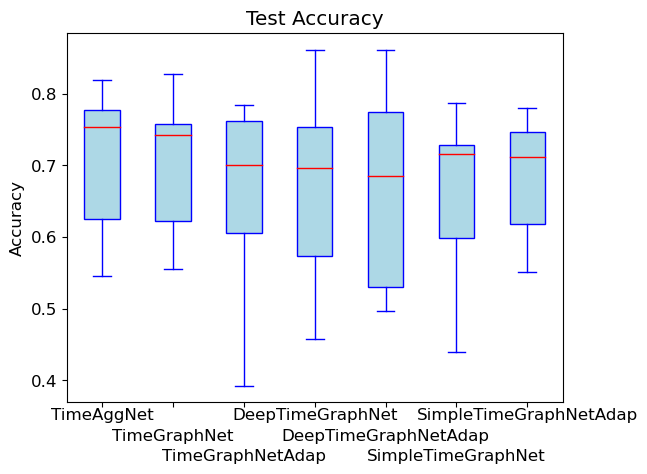

In [122]:
fig, ax = plt.subplots()

ticks = list(range(1,1+len(dframes[0].index)))

ax.boxplot(metrics, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            capprops=dict(color='blue'),
            meanline=True,
            meanprops=dict(color='orange'),
            whiskerprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=12, linestyle='none'),
            medianprops=dict(color='red'))
ax.set_xticks(ticks)
ax.set_xticklabels(list(dframes[0].index))
ax.set_ylabel("Accuracy")
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    tick.set_pad(15*(i%3))
    
#ax.scatter(X, metrics.flatten())
plt.title("Test Accuracy")
plt.savefig(f"./training/plots/TestACC.png", bbox_inches='tight', pad_inches=0.1)
plt.show()

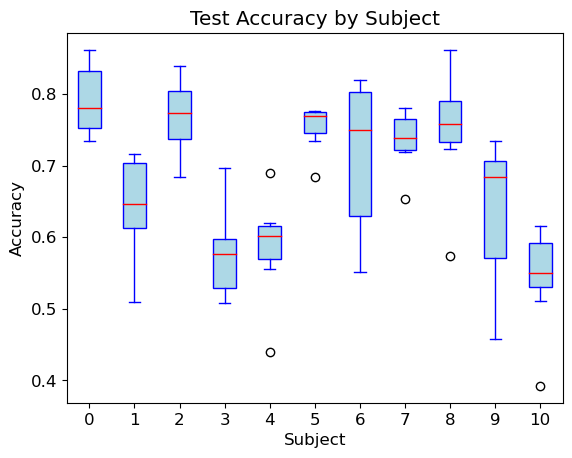

In [132]:
fig, ax = plt.subplots()

ticks = list(range(1,12))

ax.boxplot(metrics.T, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            capprops=dict(color='blue'),
            meanline=True,
            meanprops=dict(color='orange'),
            whiskerprops=dict(color='blue'),
            medianprops=dict(color='red'))
ax.set_xticks(ticks)
ax.set_xticklabels(list(range(11)))
ax.set_ylabel("Accuracy")
ax.set_xlabel("Subject")
    
#ax.scatter(X, metrics.flatten())
plt.title("Test Accuracy by Subject")
plt.savefig(f"./training/plots/TestACCSub.png")
plt.show()

## Class metrics

### Recall

In [109]:
metrics = []
for sub in range(11):
    metrics.append(dframes[sub][dframes[0].columns[1:4]].values)
metrics =  np.vstack(metrics)

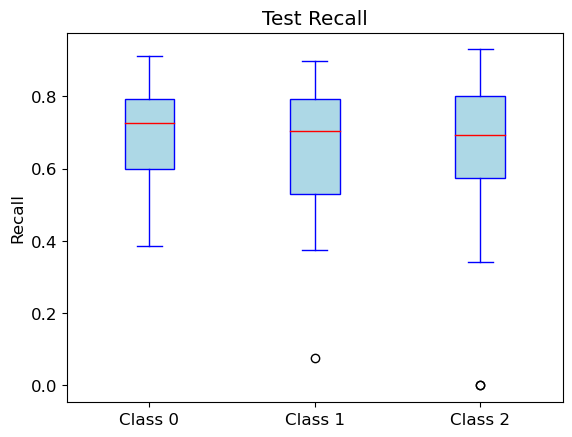

In [110]:
fig, ax = plt.subplots()

ticks = list(range(1,1+len(list(dframes[0].columns[1:4]))))

ax.boxplot(metrics, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            capprops=dict(color='blue'),
            meanline=True,
            meanprops=dict(color='orange'),
            whiskerprops=dict(color='blue'),
            medianprops=dict(color='red'))
ax.set_xticks(ticks)
ax.set_xticklabels(["Class 0", "Class 1", "Class 2"])
ax.set_ylabel("Recall")

    
#ax.scatter(X, metrics.flatten())
plt.title("Test Recall")
plt.savefig(f"./training/plots/TestRecallTotal.png")
plt.show()

### Precission

In [111]:
metrics = []
for sub in range(11):
    metrics.append(dframes[sub][dframes[0].columns[4:-3]].values)
metrics =  np.vstack(metrics)

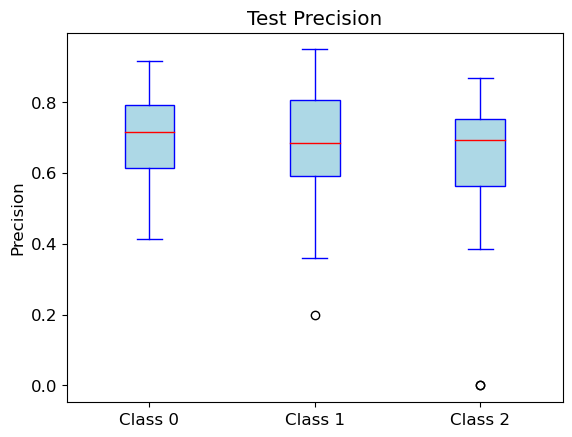

In [113]:
fig, ax = plt.subplots()

ticks = list(range(1,1+len(list(dframes[0].columns[1:4]))))

ax.boxplot(metrics, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            capprops=dict(color='blue'),
            meanline=True,
            meanprops=dict(color='orange'),
            whiskerprops=dict(color='blue'),
            medianprops=dict(color='red'))
ax.set_xticks(ticks)
ax.set_xticklabels(["Class 0", "Class 1", "Class 2"])
ax.set_ylabel("Precision")

    
#ax.scatter(X, metrics.flatten())
plt.title("Test Precision")
plt.savefig(f"./training/plots/TestPrecisionTotal.png")
plt.show()

### Adapt

In [4]:
m = "Accuracy"
metrics = []
for sub in range(11):
    metrics.append(dframes[sub][m].values)
metrics =  np.stack(metrics)

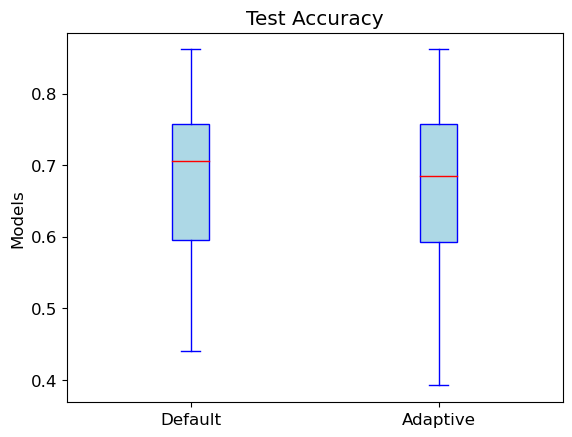

In [15]:
fig, ax = plt.subplots()

ticks = list(range(1,3))

ax.boxplot([metrics[:,[1,3,5]].flatten(), metrics[:,[2,4,6]].flatten()], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            capprops=dict(color='blue'),
            meanline=True,
            meanprops=dict(color='orange'),
            whiskerprops=dict(color='blue'),
            medianprops=dict(color='red'))
ax.set_xticks(ticks)
ax.set_xticklabels(["Default", "Adaptive"])
ax.set_ylabel("Accuracy")
ax.set_ylabel("Models")

    
#ax.scatter(X, metrics.flatten())
plt.title("Test Accuracy")
plt.savefig(f"./training/plots/TestAdap.png")
plt.show()

In [14]:
metrics.shape

(11, 7)

In [13]:
len(metrics[:,0])

11

Index(['TimeGraphNet', 'DeepTimeGraphNet', 'SimpleTimeGraphNet'], dtype='object')

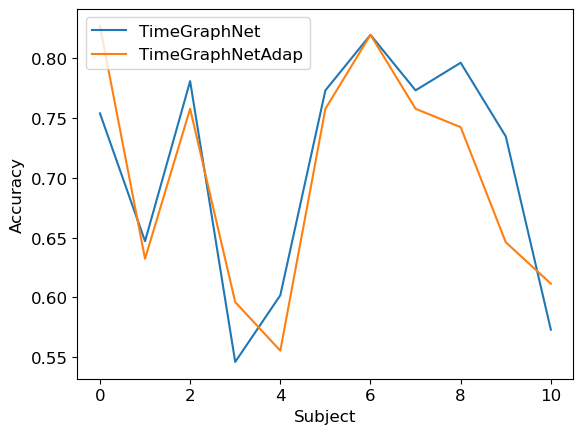

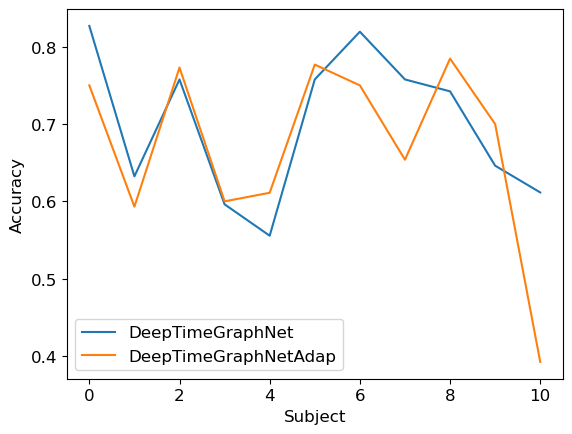

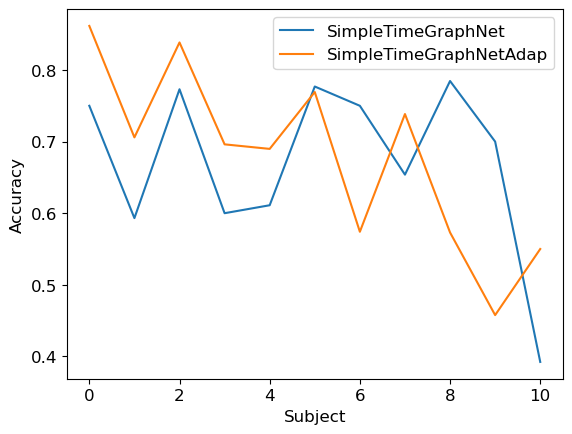

In [25]:
for i,name in enumerate(list(dframes[0].index[1::2])):
    plt.plot(metrics[:,i], label=name)
    plt.plot(metrics[:,i+1], label=name+'Adap')
    plt.legend()
    plt.xlabel("Subject")
    plt.ylabel("Accuracy")
    plt.savefig(f"./training/plots/TestAdap{i}.png")
    plt.show()